# Objetivo proyecto:  Sales-Prediction

OBJETIVO: El proyecto consiste en realizar una predicción de ventas para productos alimenticios que se venden en distintas tiendas. El objetivo es ayudar a la tienda a comprender las propiedades de los productos y establecimientos que tienen un rol crucial en aumentar las ventas.

Para iniciar, importamos las librerarias a utilizar. Pandas y Numpy

# Importar librerías

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar data

El objetivo de esta sección será:

- Asegurar de que se han cargado los datos correctamente.
- Ver qué tipo de datos tienes.
- Revisar la validez de los datos

In [3]:
df = pd.read_csv('/users/sebastianmoyacamus/codingdojo/sales_predictions.csv')

In [4]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
df.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


# Verificación del tipo de datos

Luego, revisamos el tipo de datos de la columna
Queremos ver los tipos de datos de la columna para ver con qué tipo de datos estamos trabajando. Una vez que comencemos a construir modelos, necesitamos que todos nuestros datos estén en un tipo de columna numérica (enteros o flotantes) - así que presta más atención a cualquier columna de tipo «objeto».

In [6]:
# Verificar los tipos de datos de las columna usando el atributo dtypes
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [7]:
# Usamos el atributo shape para obtener el número de filas y columnas del marco de datos
df.shape

(8523, 12)

Identificar datos faltantes

En Pandas, los valores faltantes se suelen llamar «NaN» o «None».

Los datos faltantes pueden:

- Indicar errores de recolección de datos.
- Indicar conversiones o manipulaciones inadecuadas.
- Los datos faltantes pueden estar listados como «cero», «falso», «no aplicable», «ingresados en una cadena vacía», entre otras posibilidades.

In [8]:
# Usamos el método info da a la columna tipos de datos + el número de valores no nulos
# De esta manera verificamos si hay valores perdidos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


## Identificación de valores nulos

Aplicación de 2 métodos: 
- Apply
- filtro

In [9]:
df.apply(lambda x: sum(x.isnull()))

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Nuestro DF, está compuesto por 12 columnas y podemos observar que cuenta con valores nulos en las columnas "Item_Weight" y "Outlet_Size".

In [10]:
df.apply(lambda x: len(x.unique()))

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

Hay 1559 productos y 10 outlet. En item type podemos observar 16 valores únicos 

In [11]:
#Existe otro método para determinar las filas NaN
Weight_missing = df['Item_Weight'].isna()
# Mira las filas que contienen NaN para la columna "Item Weight"
df.loc[Weight_missing,:]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362
...,...,...,...,...,...,...,...,...,...,...,...,...
8485,DRK37,NaN,Low Fat,0.043792,Soft Drinks,189.0530,OUT027,1985,Medium,Tier 3,Supermarket Type3,6261.8490
8487,DRG13,NaN,Low Fat,0.037006,Soft Drinks,164.7526,OUT027,1985,Medium,Tier 3,Supermarket Type3,4111.3150
8488,NCN14,NaN,Low Fat,0.091473,Others,184.6608,OUT027,1985,Medium,Tier 3,Supermarket Type3,2756.4120
8490,FDU44,NaN,Regular,0.102296,Fruits and Vegetables,162.3552,OUT019,1985,Small,Tier 1,Grocery Store,487.3656


In [12]:
#Sumamos todas las filas con valores perdidos para la columna Item_Weight
df['Item_Weight'].isna().sum()

1463

Observamos que, tenemos 1463 filas nulas para la columna Item_Weight.
Repetimos el proceso para la columna Outlet_Size

In [13]:
Size_missing = df['Outlet_Size'].isna()
# Observamos las filas que contienen NaN para la columna "Outlet_Size"
df.loc[Size_missing,:]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350
25,NCD06,13.000,Low Fat,0.099887,Household,45.9060,OUT017,2007,NaN,Tier 2,Supermarket Type1,838.9080
28,FDE51,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,NaN,Tier 3,Grocery Store,178.4344
...,...,...,...,...,...,...,...,...,...,...,...,...
8502,NCH43,8.420,Low Fat,0.070712,Household,216.4192,OUT045,2002,NaN,Tier 2,Supermarket Type1,3020.0688
8508,FDW31,11.350,Regular,0.043246,Fruits and Vegetables,199.4742,OUT045,2002,NaN,Tier 2,Supermarket Type1,2587.9646
8509,FDG45,8.100,Low Fat,0.214306,Fruits and Vegetables,213.9902,OUT010,1998,NaN,Tier 3,Grocery Store,424.7804
8514,FDA01,15.000,Regular,0.054489,Canned,57.5904,OUT045,2002,NaN,Tier 2,Supermarket Type1,468.7232


In [14]:
#Sumamos todas las filas con valores perdidos para la columna Outlet_Size
df['Outlet_Size'].isna().sum()

2410

In [15]:
from scipy.stats import mode

In [16]:
outlet_size_mode = df.pivot_table(values='Outlet_Size', columns='Outlet_Type',aggfunc=lambda x:x.mode())
outlet_size_mode

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [17]:
def impute_size_mode(cols):
    Size = cols[0]
    Type = cols[1]
    if pd.isnull(Size):
        return outlet_size_mode.loc['Outlet_Size'][outlet_size_mode.columns == Type][0]
    else:
        return Size
print ('Orignal #missing: %d'%sum(df['Outlet_Size'].isnull()))
df['Outlet_Size'] = df[['Outlet_Size','Outlet_Type']].apply(impute_size_mode,axis=1)
print ('Final #missing: %d'%sum(df['Outlet_Size'].isnull()))

Orignal #missing: 2410
Final #missing: 0


Para la columna Outlet_Size, se observan 2.410 filas nulas.

In [18]:
df1 = df

In [19]:
filtro5 = df1['Item_Identifier'] == 'FDP10'
filtro6 = df1.loc[filtro5]
filtro6


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
585,FDP10,19.0,Low Fat,0.128066,Snack Foods,104.3622,OUT035,2004,Small,Tier 2,Supermarket Type1,1905.5196
2623,FDP10,19.0,Low Fat,0.128815,Snack Foods,107.6622,OUT017,2007,Small,Tier 2,Supermarket Type1,1164.4842
3382,FDP10,19.0,Low Fat,0.128289,Snack Foods,104.9622,OUT049,1999,Medium,Tier 1,Supermarket Type1,1164.4842
4585,FDP10,19.0,Low Fat,0.128090,Snack Foods,107.0622,OUT046,1997,Small,Tier 1,Supermarket Type1,1376.2086
6087,FDP10,19.0,Low Fat,0.128350,Snack Foods,106.5622,OUT045,2002,Small,Tier 2,Supermarket Type1,1482.0708
7883,FDP10,19.0,Low Fat,0.127984,Snack Foods,107.6622,OUT013,1987,High,Tier 3,Supermarket Type1,1270.3464


In [20]:
filtro6.loc[7]

Item_Identifier                          FDP10
Item_Weight                                NaN
Item_Fat_Content                       Low Fat
Item_Visibility                        0.12747
Item_Type                          Snack Foods
Item_MRP                               107.762
Outlet_Identifier                       OUT027
Outlet_Establishment_Year                 1985
Outlet_Size                             Medium
Outlet_Location_Type                    Tier 3
Outlet_Type                  Supermarket Type3
Item_Outlet_Sales                      4022.76
Name: 7, dtype: object

Podemos observar, que cada identificador tiene un peso asignado. Por lo tanto, FDP10 

##MISSING VALUE

In [21]:
df.shape

(8523, 12)

In [22]:
df.apply(lambda x: sum(x.isnull()))

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

## Asignación de los valores promedio de cada identificador a los valores nulos de peso

In [23]:
df2 = df

In [24]:
item_avg_weight = df.pivot_table(values='Item_Weight', index='Item_Identifier')
item_avg_weight

,Item_Weight
Item_Identifier,
DRA12,11.600
DRA24,19.350
DRA59,8.270
DRB01,7.390
DRB13,6.115
...,...
NCZ30,6.590
NCZ41,19.850
NCZ42,10.500


Volvemos a comprobar que podemos recuperar de esta tabla el peso medio de todos los productos con el mismo Item_Identifier.

In [25]:
for item in item_avg_weight.index:
  for i in df[df['Item_Identifier'] == item]['Item_Weight'].index:
    df.loc[i, 'Item_Weight'] = item_avg_weight.loc[item][0]

In [26]:
#df df 

### Revisión de valores asignados

In [27]:
df.apply(lambda x: sum(x.isnull()))

Item_Identifier              0
Item_Weight                  4
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [28]:
df.dropna( inplace= True)

In [29]:
df.apply(lambda x: sum(x.isnull()))

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [30]:
df.shape

(8519, 12)

# Análisis de variables

## Variable objetivo

Text(0.5, 1.0, 'Item_Outlet_Sales Distribution')

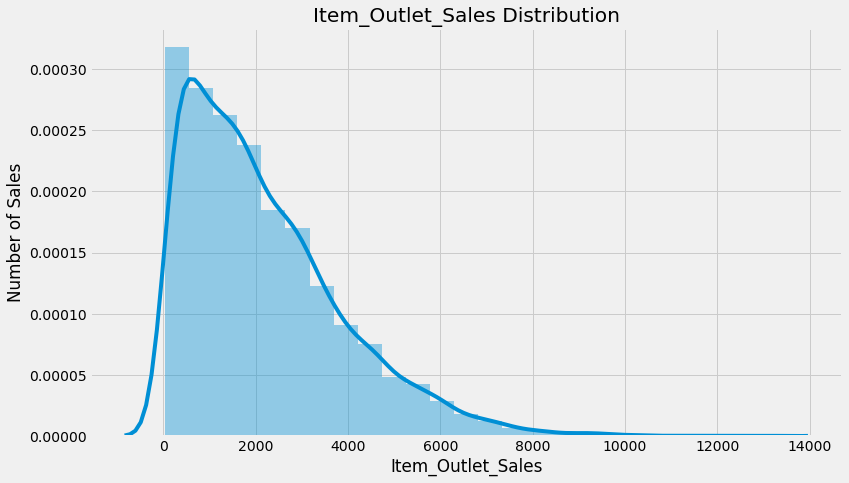

In [31]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,7))
sns.distplot(df.Item_Outlet_Sales, bins = 25)
plt.ticklabel_format(style='plain', axis='x', scilimits=(0,1))
plt.xlabel("Item_Outlet_Sales")
plt.ylabel("Number of Sales")
plt.title("Item_Outlet_Sales Distribution")

## Variables numéricas

In [32]:
corr = df.corr()
corr

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.009173,0.025975,-0.013426,0.013168
Item_Visibility,-0.009173,1.000000,-0.001155,-0.074325,-0.128297
Item_MRP,0.025975,-0.001155,1.000000,0.004599,0.567803
Outlet_Establishment_Year,-0.013426,-0.074325,0.004599,1.000000,-0.049083
Item_Outlet_Sales,0.013168,-0.128297,0.567803,-0.049083,1.000000


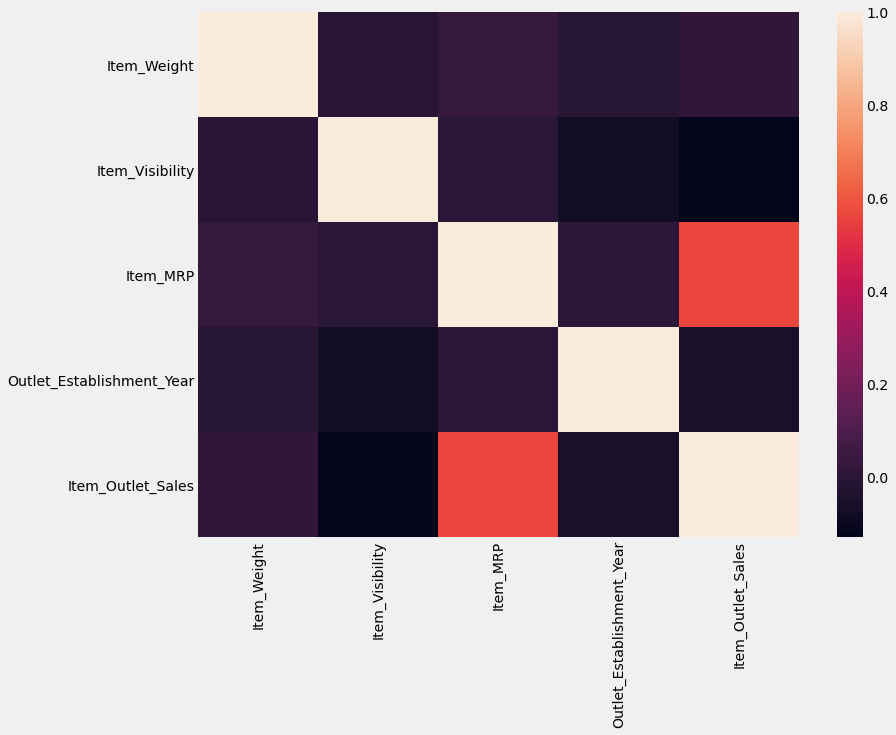

In [33]:
plt.figure(figsize = (12, 9))
sns.heatmap(df.corr())
plt.show()

In [34]:
corr['Item_Outlet_Sales'].sort_values(ascending=False)

Item_Outlet_Sales            1.000000
Item_MRP                     0.567803
Item_Weight                  0.013168
Outlet_Establishment_Year   -0.049083
Item_Visibility             -0.128297
Name: Item_Outlet_Sales, dtype: float64

De las variables numéricas actuales podemos observar que Item_Visibility es la característica con la correlación más baja con nuestra variable objetivo. Por lo tanto, cuanto menos visible sea el producto en la tienda, mayor será el precio. Esto es curioso ya que a partir de los supuestos iniciales se esperaba que estas variables tuvieran un alto impacto en el incremento de las ventas. Sin embargo, dado que este no es un comportamiento esperado, debemos investigar. Además, esta característica tiene una correlación negativa con todas las demás características. Además, la correlación más positiva pertenece a Item_MRP.

## Variables categóricas

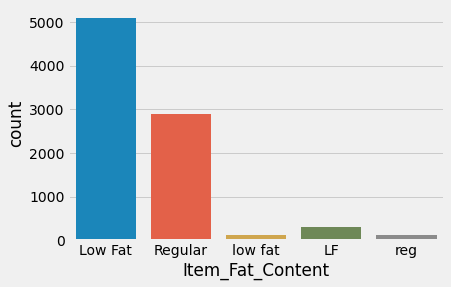

In [35]:
sns.countplot(df.Item_Fat_Content)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text major ticklabel objects>)

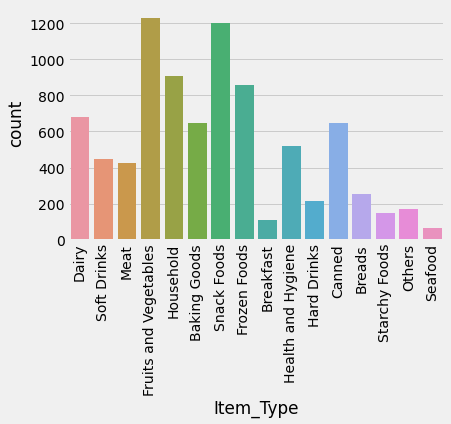

In [36]:
sns.countplot(df.Item_Type)
plt.xticks(rotation=90)


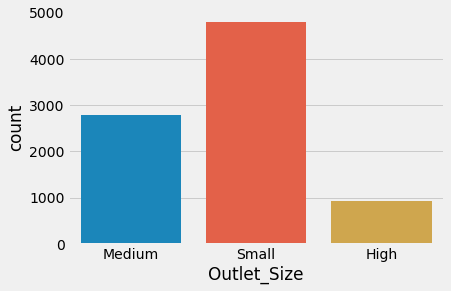

In [37]:
sns.countplot(df.Outlet_Size)


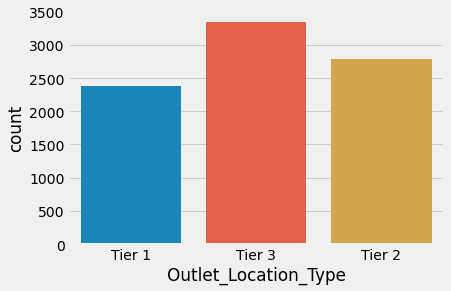

In [38]:
sns.countplot(df.Outlet_Location_Type)


(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

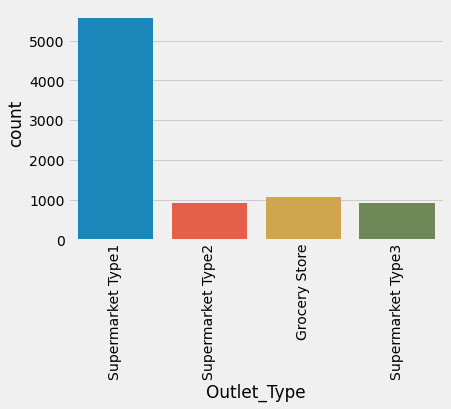

In [39]:
sns.countplot(df.Outlet_Type)
plt.xticks(rotation=90)

Para la parte 4, tu tarea es completar cualquier análisis estadístico que te podría ayudar a entender, explicar o modelar tus datos. Esto podría incluir:

Histogramas para ver la distribución de varias características en tu conjunto de datos
Diagramas de caja para ver los resúmenes estadísticos de varias características en tu conjunto de datos.
Bonus: mapas de calor de las correlaciones entre características
Cualquier cosa que quieras continuar refinando para el proyecto (siéntete libre de continuar con los trabajos de las semanas anteriores que no tuviste tiempo para completar).

In [40]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8519.000000,8519.000000,8519.000000,8519.000000,8519.000000
mean,12.875420,0.066112,141.010019,1997.837892,2181.188779
std,4.646098,0.051586,62.283594,8.369105,1706.511093
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.785000,0.026983,93.844900,1987.000000,834.247400
50%,12.650000,0.053925,143.047000,1999.000000,1794.331000
75%,16.850000,0.094558,185.676600,2004.000000,3100.630600
max,21.350000,0.328391,266.888400,2009.000000,13086.964800
